<a href="https://colab.research.google.com/github/Lzyu0926/portfolios/blob/main/CNN_%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [4]:
from tensorflow.keras.datasets import mnist

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [39]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [40]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
n = 9487

In [10]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [33]:
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

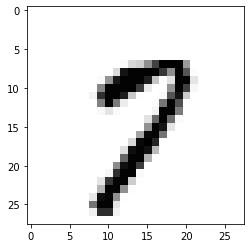

In [41]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [42]:
x_train = x_train.reshape(60000, 784)/255 #將矩陣拉平
x_test = x_test.reshape(10000, 784)/255

In [43]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [23]:
model = Sequential() #打開空白神經網路學習機 

In [24]:
model.add(Dense(100, input_dim=784, activation='relu')) #100 是指神經元數量 ,input_dim是輸入大小 #relu: 神經網路激發函數

In [25]:
model.add(Dense(100, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax')) 

#### 組裝我們的神經網路

In [46]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),    #mse 平均平方差 lr學習率
              metrics=['accuracy']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### 欣賞我們的作品

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [61]:
model.fit(x_train, y_train, batch_size=100, epochs=20) 
#訓練 batch size: 分成100次做,每次做完檢討
#總共epochs 做20次

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0788 - accuracy: 0.3884
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0460 - accuracy: 0.7365
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0272 - accuracy: 0.8457
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0210 - accuracy: 0.8747
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.8898
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.8977
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0154 - accuracy: 0.9028
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0146 - accuracy: 0.9069
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9112
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0134 - accuracy: 0.9148

### 6. step 3: 預測 (testing)

In [62]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

神經網路預測是: 4


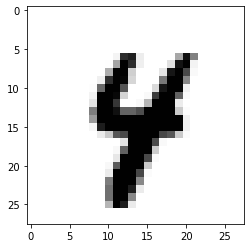

In [64]:
n = 9997

print('神經網路預測是:', classes_x[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [65]:
model.save("my_nn.h5")

In [66]:
import tensorflow as tf

In [67]:
tf.test.gpu_device_name()

'/device:GPU:0'